In [25]:
#pip install pandas
import pandas as pd
step_data = [3620, 7891, 9761, 3907, 4338, 5373]
step_counts = pd.Series(step_data, name='steps')
print(step_counts)

0    3620
1    7891
2    9761
3    3907
4    4338
5    5373
Name: steps, dtype: int64


In [26]:
step_counts.index = pd.date_range ('20150329', periods = 6)
print(step_counts)

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: steps, dtype: int64


In [32]:
# Just like a dictionary
print(step_counts['2015-04-01'])

# Or by index position—like an array
print(step_counts[3])

# Select all of April
print(step_counts['2015-04'])

3907
3907
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: steps, dtype: int64


In [33]:
# View the data type
print(step_counts.dtypes)

import numpy as np
# Convert to a float
step_counts = step_counts.astype(np.float)

# View the data type
print(step_counts.dtypes)

int64
float64


In [43]:
#Create invalid data
step_counts[1:3] = np.NaN
# Now fill it in with zeros
step_counts = step_counts.fillna(0.)
# equivalently,
# step_counts.fillna(0., inplace=True)
print(step_counts[1:3])

2015-03-30    0.0
2015-03-31    0.0
Freq: D, Name: steps, dtype: float64


In [44]:
# Cycling distance
cycling_data = [10.7, 0, None, 2.4, 15.3, 10.9, 0, None]
# Create a tuple of data
joined_data = list(zip(step_data,cycling_data))
# The dataframe
activity_df = pd.DataFrame(joined_data)
print(activity_df)

      0     1
0  3620  10.7
1  7891   0.0
2  9761   NaN
3  3907   2.4
4  4338  15.3
5  5373  10.9


In [50]:
# Add column names to dataframe
activity_df = pd.DataFrame (joined_data, index=pd.date_range ('20150329', periods=6), columns= ['Walking', 'Cycling'])
print(activity_df)

            Walking  Cycling
2015-03-29     3620     10.7
2015-03-30     7891      0.0
2015-03-31     9761      NaN
2015-04-01     3907      2.4
2015-04-02     4338     15.3
2015-04-03     5373     10.9


In [51]:
# Select row of data by index name
print(activity_df.loc['2015-04-01'])

Walking    3907.0
Cycling       2.4
Name: 2015-04-01 00:00:00, dtype: float64


In [52]:
# Select row of data by integer position
print(activity_df.iloc[-3])

Walking    3907.0
Cycling       2.4
Name: 2015-04-01 00:00:00, dtype: float64


In [53]:
# Name of column
print(activity_df['Walking'])

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


In [54]:
# Object-oriented approach
print(activity_df.Walking)

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


In [55]:
# First column
print(activity_df.iloc[:,0])

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


In [59]:
# The location of the data file
filepath = 'C:/Users/shailendra.tomar/Intel-ML101_Class1/data/Iris_Data.csv'
# Import the data
data = pd.read_csv(filepath)
# Print a few rows
print(data.iloc[:5])

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [64]:
# Create a new column that is a product
# of both measurements
data['sepal_area'] = data.sepal_length *data.sepal_width
# Print a few rows and columns
print(data.iloc[:5, -3:])

   petal_width      species  sepal_area
0          0.2  Iris-setosa       17.85
1          0.2  Iris-setosa       14.70
2          0.2  Iris-setosa       15.04
3          0.2  Iris-setosa       14.26
4          0.2  Iris-setosa       18.00


In [66]:
# The lambda function applies what
# follows it to each row of data
data['abbrev'] = (data.species.apply(lambda x: x.replace('Iris-', '')))
# Note that there are other ways to
# accomplish the above
print(data.iloc[:5, -3:])

# Note that there are other ways to
# accomplish the above
print(data.iloc[:5, -3:])

       species  sepal_area  abbrev
0  Iris-setosa       17.85  setosa
1  Iris-setosa       14.70  setosa
2  Iris-setosa       15.04  setosa
3  Iris-setosa       14.26  setosa
4  Iris-setosa       18.00  setosa
       species  sepal_area  abbrev
0  Iris-setosa       17.85  setosa
1  Iris-setosa       14.70  setosa
2  Iris-setosa       15.04  setosa
3  Iris-setosa       14.26  setosa
4  Iris-setosa       18.00  setosa


In [70]:
# Concatenate the first two and
# last two rows
small_data = pd.concat([data.iloc[:2],
data.iloc[-2:]])
print(small_data.iloc[:,-3:])
# See the 'join' method for
# SQL style joining of dataframes

            species  sepal_area     abbrev
0       Iris-setosa       17.85     setosa
1       Iris-setosa       14.70     setosa
148  Iris-virginica       21.08  virginica
149  Iris-virginica       17.70  virginica


In [71]:
# Use the size method with a
# DataFrame to get count
# For a Series, use the .value_counts
# method
group_sizes = (data.groupby('species').size())
print(group_sizes)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [74]:
# Mean calculated on a DataFrame
print(data.mean())

# Median calculated on a Series
print(data.petal_length.median())

# Mode calculated on a Series
print(data.petal_length.mode())

sepal_length     5.843333
sepal_width      3.054000
petal_length     3.758667
petal_width      1.198667
sepal_area      17.806533
dtype: float64
4.35
0    1.5
dtype: float64


In [77]:
# Standard dev, variance, and SEM
print(data.petal_length.std(),
data.petal_length.var(),
data.petal_length.sem())

#As well as quantiles
print(data.quantile(0))

1.7644204199522626 3.113179418344519 0.1440643240210085
sepal_length     4.3
sepal_width      2.0
petal_length     1.0
petal_width      0.1
sepal_area      10.0
Name: 0, dtype: float64


In [78]:
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width  sepal_area
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667   17.806533
std        0.828066     0.433594      1.764420     0.763161    3.368693
min        4.300000     2.000000      1.000000     0.100000   10.000000
25%        5.100000     2.800000      1.600000     0.300000   15.645000
50%        5.800000     3.000000      4.350000     1.300000   17.660000
75%        6.400000     3.300000      5.100000     1.800000   20.325000
max        7.900000     4.400000      6.900000     2.500000   30.020000


In [79]:
# Sample 5 rows without replacement
sample = (data.sample(n=5,replace=False, random_state=42))
print(sample.iloc[:,-3:])

             species  sepal_area      abbrev
73   Iris-versicolor       17.08  versicolor
18       Iris-setosa       21.66      setosa
118   Iris-virginica       20.02   virginica
78   Iris-versicolor       17.40  versicolor
76   Iris-versicolor       19.04  versicolor


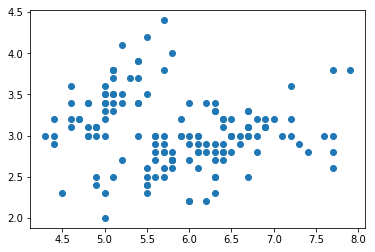

In [93]:
import matplotlib.pyplot as plt
    
plt.plot(data.sepal_length, data.sepal_width,ls ='', marker='o')

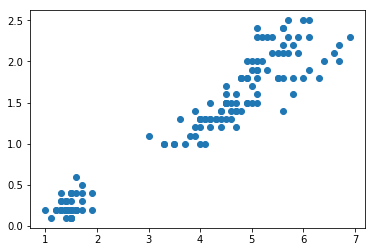

In [96]:
import matplotlib.pyplot as plt
plt.plot(data.sepal_length, data.sepal_width,ls ='', marker='o', label='sepal')
plt.plot(data.petal_length, data.petal_width,ls ='', marker='o', label='petal')

(array([ 4.,  1.,  6.,  5., 16.,  9.,  5.,  6.,  7., 14.,  7.,  9.,  6.,
        13.,  7.,  7.,  8.,  3.,  5.,  1.,  4.,  1.,  1.,  4.,  1.]),
 array([4.3  , 4.444, 4.588, 4.732, 4.876, 5.02 , 5.164, 5.308, 5.452,
        5.596, 5.74 , 5.884, 6.028, 6.172, 6.316, 6.46 , 6.604, 6.748,
        6.892, 7.036, 7.18 , 7.324, 7.468, 7.612, 7.756, 7.9  ]),
 <a list of 25 Patch objects>)

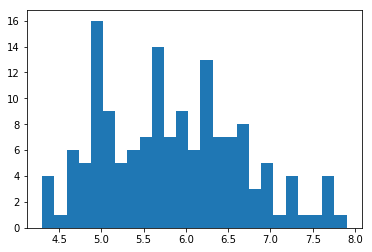

In [97]:
plt.hist(data.sepal_length, bins=25)

[Text(0,0.5,'ylabel'), Text(0.5,0,'xlabel'), Text(0.5,1,'Title')]

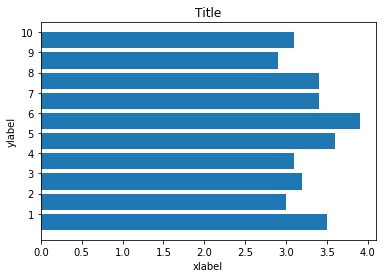

In [98]:
fig, ax = plt.subplots()
ax.barh(np.arange(10),data.sepal_width.iloc[:10])
# Set position of ticks and tick labels
ax.set_yticks(np.arange(0.4,10.4,1.0))
ax.set_yticklabels(np.arange(1,11))
ax.set(xlabel='xlabel', ylabel='ylabel', title='Title')

In [107]:
data.groupby('species').mean().plot(color=['red','blue', 'black','green'], fontsize=10.0, figsize=(4,4))

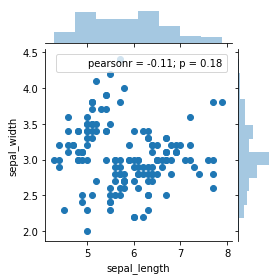

In [109]:
import seaborn as sns
sns.jointplot(x='sepal_length',y='sepal_width',data=data, size=4)

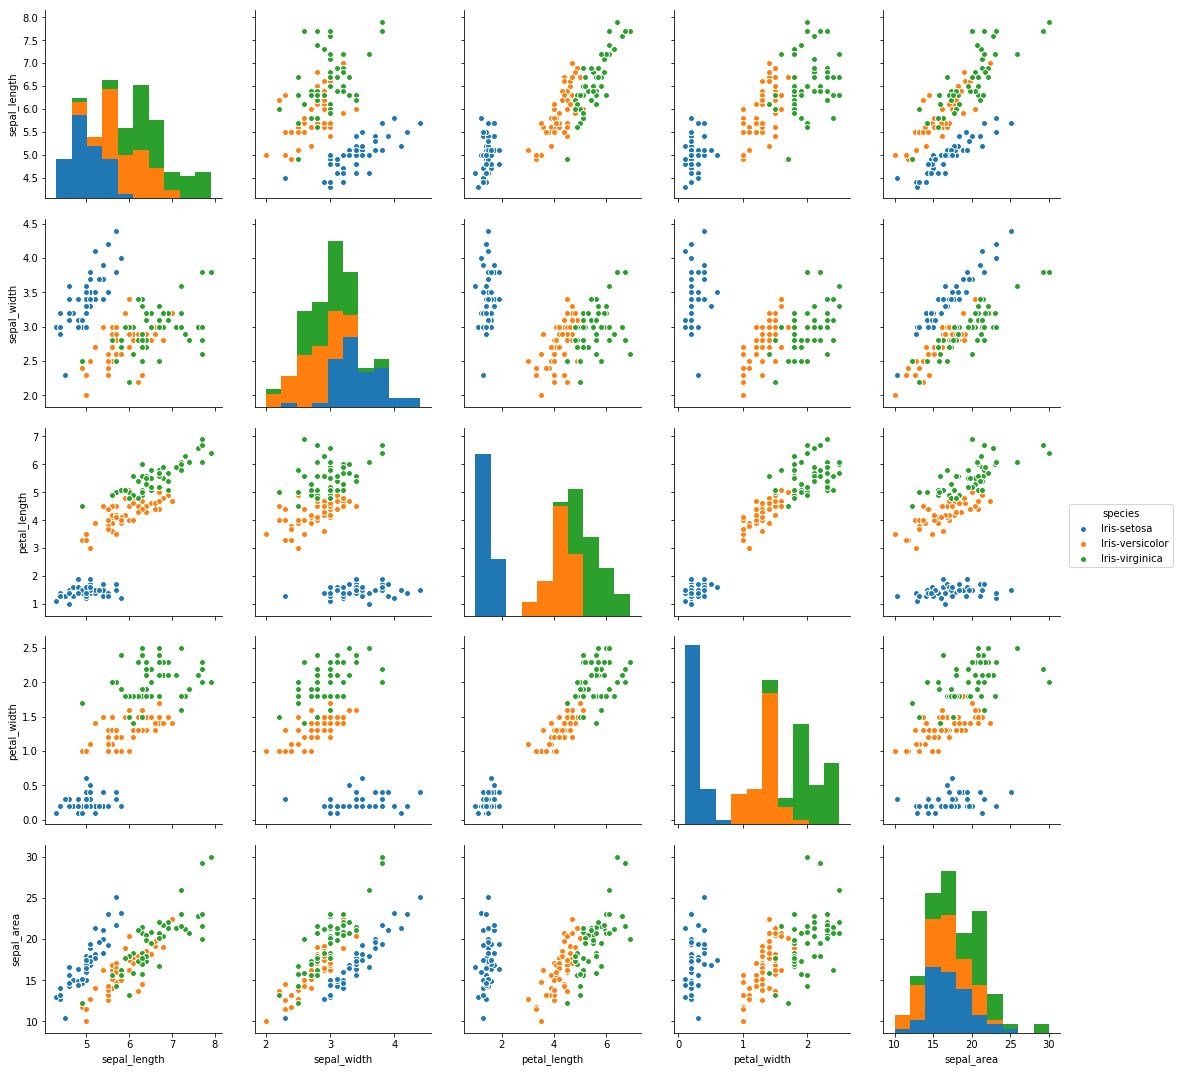

In [110]:
sns.pairplot(data, hue='species',size=3)